<a href="https://colab.research.google.com/github/DesiPilla/MLTSA_DPilla/blob/master/HW2/ARIMA_instructions.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [218]:
import pandas as pd
import numpy as np
import pylab as plt
import json
import os
import glob

from pandas.plotting import scatter_matrix
import statsmodels.api as sm
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

import warnings
warnings.filterwarnings("ignore")

%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [0]:
plt.style.use("https://raw.githubusercontent.com/fedhere/MLTSA_FBianco/master/fbb.mplstyle")

# data ingestion

read in the first 10 files, in alphabetical order, in the https://www.kaggle.com/borismarjanovic/price-volume-data-for-all-us-stocks-etfs Stock dataset. Follow [this notebook](https://github.com/fedhere/MLTSA_FBianco/blob/master/CodeExamples/Kaggledata_load.ipynb) for guidance on how to programmatically access the Kaggle data. The data must be accessed from a google colab notebook programmatically using the Kaggle API and software. 
Note: to sort file alphabecially you can use the glob package and the sort function of numpy:

The files need to be in a single dataframe with "Date" as index. 

Read in each file (e.g. with ```pd.read_csv()``` into a dataframe. Merge each df recursively with the previous one using the ```merge()``` method of dataframes, mergin on "Date". Use only the "Close" column (the price at closing). Rename  each column by the name of the file (e.g. the "Close" column of the "a.us.txt" file should be named "a.us"


There is a partial solution available in the slides (very last slide in [MLTSA2](https://slides.com/federicabianco/mltsa2/live?context=editing#/14/1))



In [183]:
!pip install kaggle

In [184]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [193]:
cd 'gdrive/My Drive/'

[Errno 2] No such file or directory: 'gdrive/My Drive/'
/content/drive/My Drive/Colab Notebooks/MLTSA/stocks


In [0]:
envs = json.load(open("kaggle.json", "r"))
os.environ["KAGGLE_USERNAME"] = envs['username']
os.environ["KAGGLE_KEY"] = envs['key']

In [199]:
cd 'Colab Notebooks/MLTSA'

/content/drive/My Drive/Colab Notebooks/MLTSA


In [200]:
!mkdir stocks

mkdir: cannot create directory ‘stocks’: File exists


In [201]:
cd stocks

/content/drive/My Drive/Colab Notebooks/MLTSA/stocks


In [0]:
!kaggle datasets download borismarjanovic/price-volume-data-for-all-us-stocks-etfs

In [202]:
ls

Data/  ETFs/  price-volume-data-for-all-us-stocks-etfs.zip  Stocks/


In [0]:
!unzip price-volume-data-for-all-us-stocks-etfs

In [203]:
cd Stocks

/content/drive/My Drive/Colab Notebooks/MLTSA/stocks/Stocks


In [205]:
files = np.sort(np.array(glob.glob("*.txt")))[:10]

tss = pd.read_csv(files[0])[["Date", "Close"]].rename(columns = {"Close":files[0][:-4]})

for f in files[1:]:
    tss = pd.merge(tss, pd.read_csv(f)[["Date", "Close"]].rename(columns = {"Close":f[:-4]}), on="Date")

tss.set_index("Date", inplace = True)
print("shape of the dataset:", tss.shape)

shape of the dataset: (447, 10)


In [206]:
tss.head()

,a.us,aa.us,aaap.us,aaba.us,aac.us,aal.us,aamc.us,aame.us,aan.us,aaoi.us
Date,,,,,,,,,,
2015-11-11,36.901,17.779,24.50,33.38,22.56,43.524,20.75,4.7960,24.649,16.76
2015-11-12,36.734,17.206,25.00,33.23,22.50,43.044,19.17,4.8951,24.182,16.11
2015-11-13,36.030,17.581,25.26,32.19,22.68,42.603,17.50,4.6672,23.795,16.60
2015-11-16,36.577,18.242,25.02,32.94,22.58,41.994,15.58,4.8455,23.923,16.93
2015-11-17,37.607,18.197,24.62,32.86,22.52,41.473,12.59,4.9150,23.418,16.68


#  data inspection

plot each time series (ts)

i

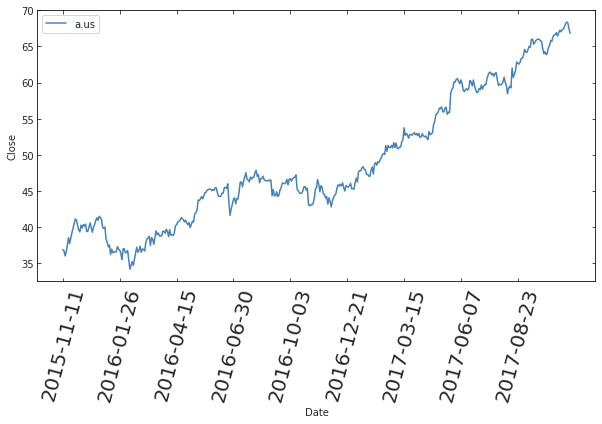

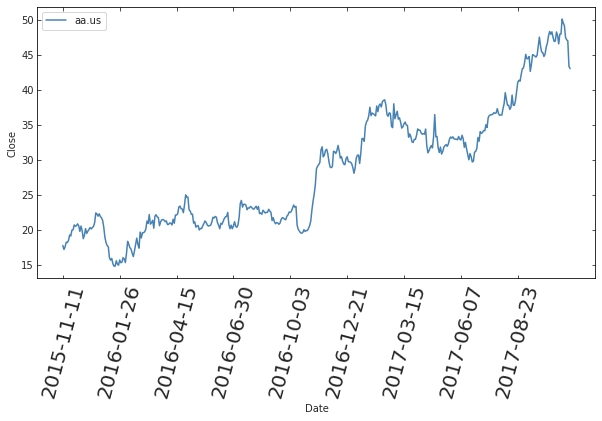

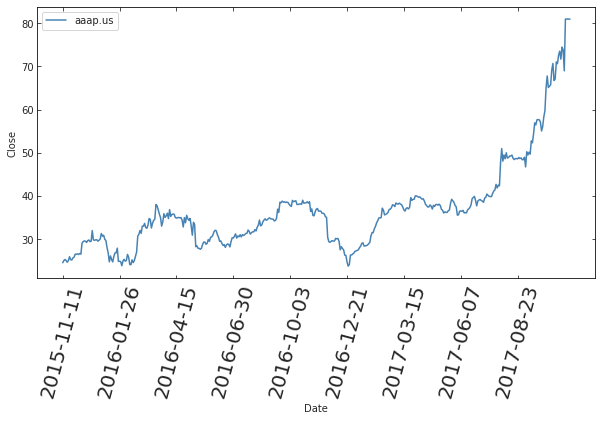

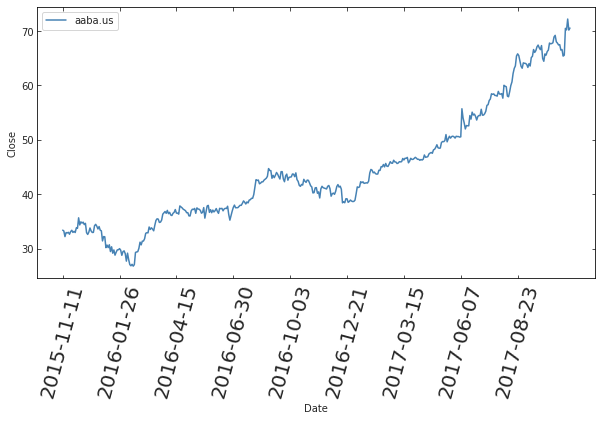

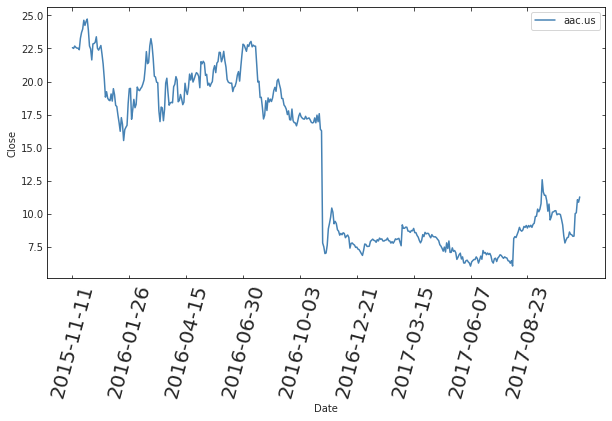

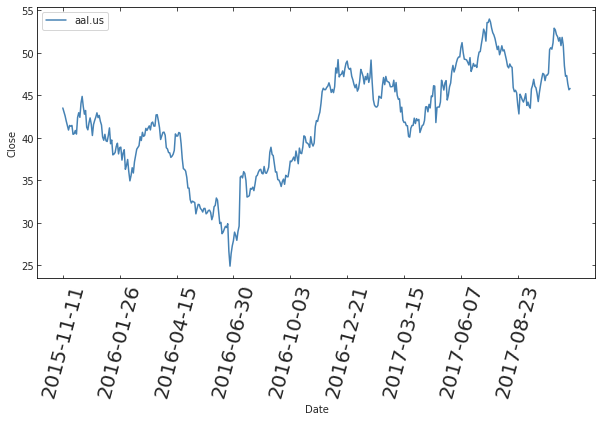

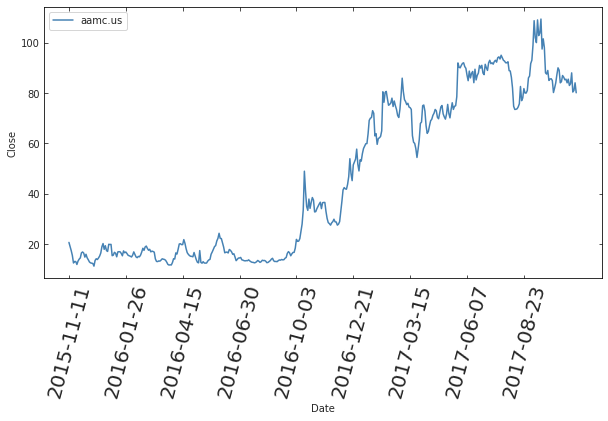

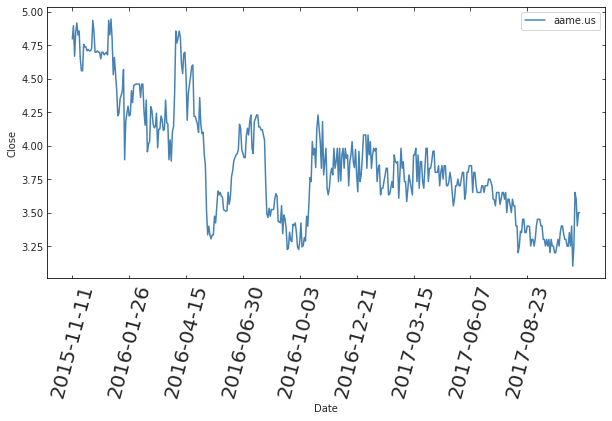

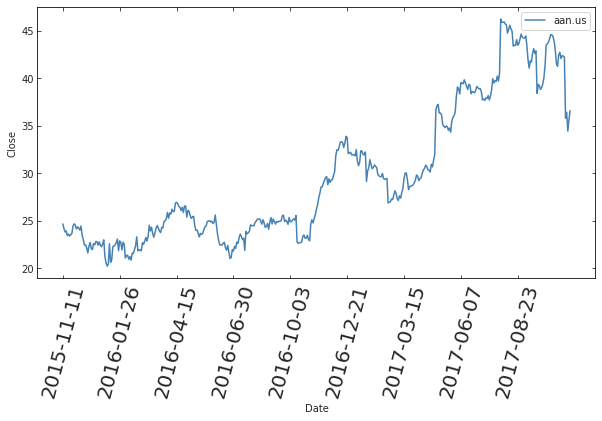

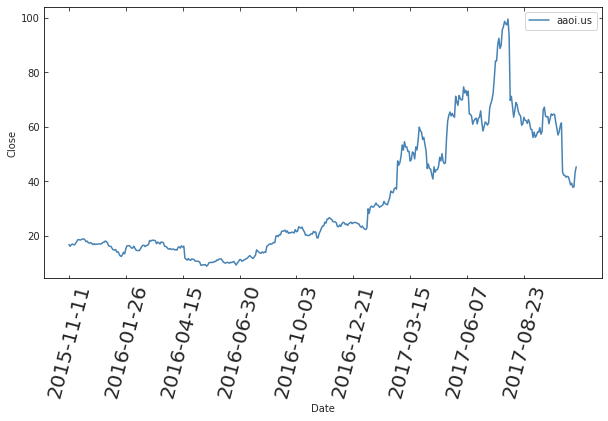

In [237]:
for c in tss.columns:
    plt.figure(figsize = (10, 5));
    plt.plot(tss.index, tss[c], label = c);
    plt.ylabel("Close");
    plt.xlabel("Date");
    plt.xticks(tss.index[::50], rotation = 75, fontsize = 20);
    plt.legend();

**Figure 1:** These plots show the closing price of individual stocks from November 2015 to late 2018.

## visualizing correlations

use ```pandas.plotting.scatter_matrix```  to look at the relationship between lightcurves

plot the pairwise correlation as a heatmap using ```pl.imshow()```. You can access the pairwise correlation with the dataframe method ```df.corr()```

findfont: Font family ['["sans-serif"]'] not found. Falling back to DejaVu Sans.


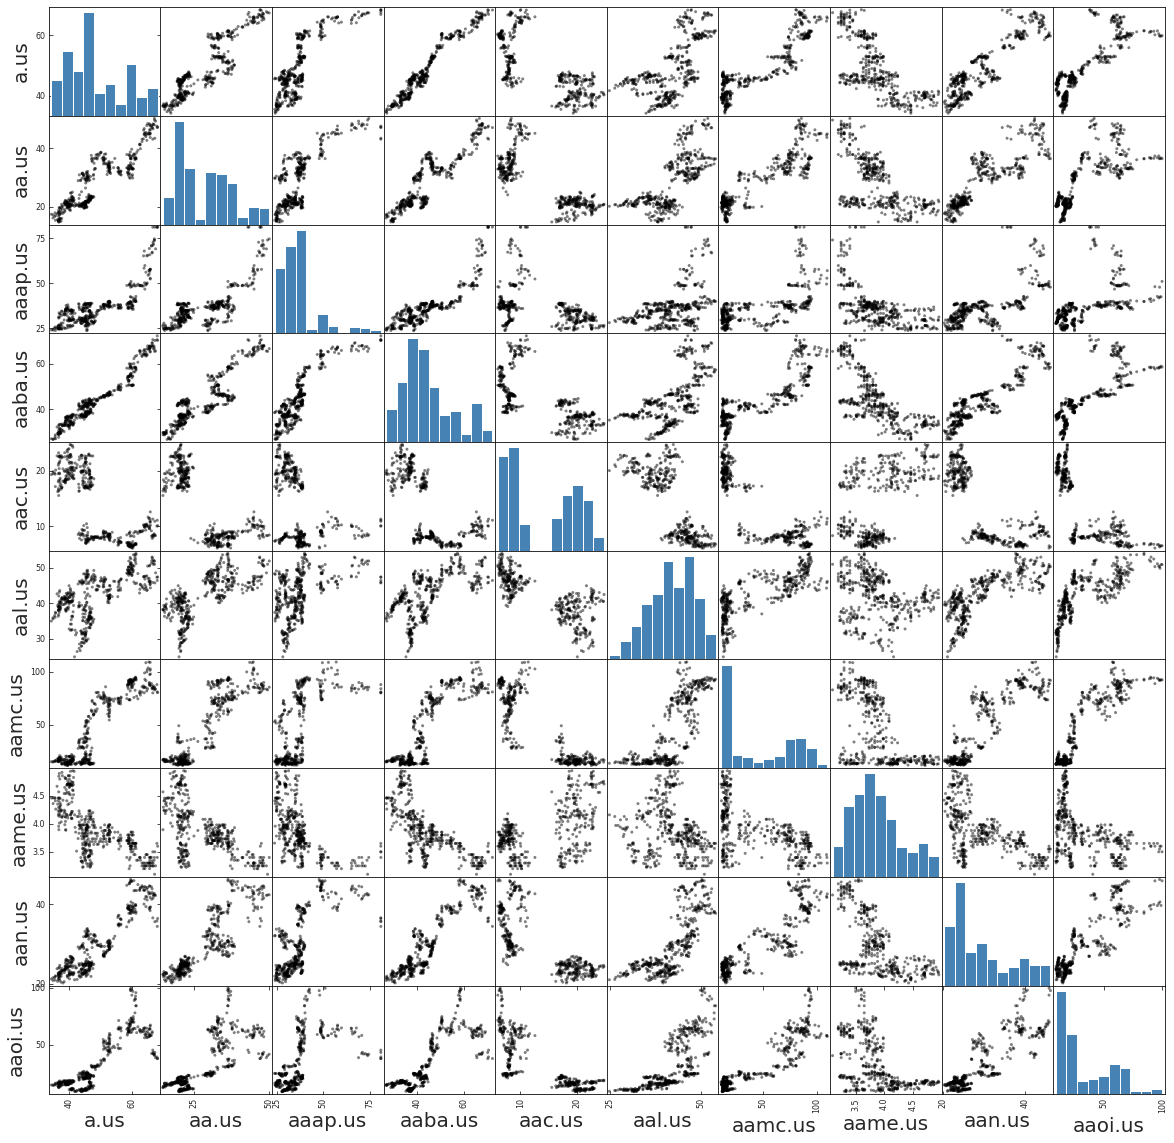

In [208]:
scatter_matrix(tss, figsize = (20, 20), c = 'k');

**Figure 2:** This scatter matrix shows the closing prices of each stock plotted against the closing price of every other stock. The diagnoal plots are histograms of the distribution of closing prices for each stock.

In [209]:
tss.corr()

,a.us,aa.us,aaap.us,aaba.us,aac.us,aal.us,aamc.us,aame.us,aan.us,aaoi.us
a.us,1.000000,0.902139,0.800310,0.973457,-0.721867,0.621041,0.897263,-0.699609,0.905395,0.851239
aa.us,0.902139,1.000000,0.776600,0.904210,-0.791137,0.713229,0.893952,-0.606774,0.873520,0.766459
aaap.us,0.800310,0.776600,1.000000,0.872134,-0.423021,0.451520,0.621329,-0.573976,0.696179,0.560427
aaba.us,0.973457,0.904210,0.872134,1.000000,-0.670578,0.612989,0.849972,-0.709023,0.903785,0.809059
aac.us,-0.721867,-0.791137,-0.423021,-0.670578,1.000000,-0.785248,-0.868936,0.510986,-0.765267,-0.780147
aal.us,0.621041,0.713229,0.451520,0.612989,-0.785248,1.000000,0.780517,-0.219258,0.756808,0.746505
aamc.us,0.897263,0.893952,0.621329,0.849972,-0.868936,0.780517,1.000000,-0.544740,0.881631,0.904166
aame.us,-0.699609,-0.606774,-0.573976,-0.709023,0.510986,-0.219258,-0.544740,1.000000,-0.585002,-0.496371
aan.us,0.905395,0.873520,0.696179,0.903785,-0.765267,0.756808,0.881631,-0.585002,1.000000,0.860847
aaoi.us,0.851239,0.766459,0.560427,0.809059,-0.780147,0.746505,0.904166,-0.496371,0.860847,1.000000


**Table 1:** This table shows the correlation between each pair of stocks. The following figure is a better way to display this information.

findfont: Font family ['["sans-serif"]'] not found. Falling back to DejaVu Sans.


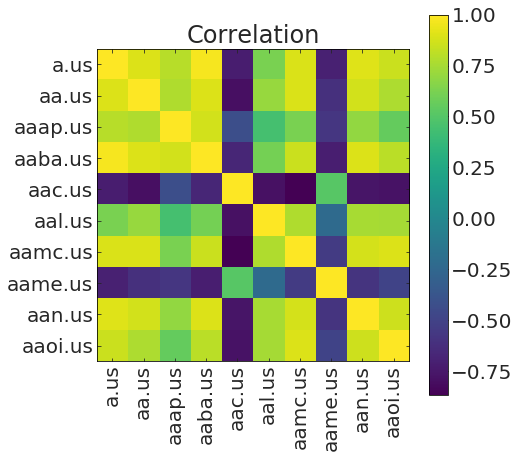

In [210]:
plt.imshow(tss.corr(), figsize(7,7));
plt.colorbar();
plt.title("Correlation");
plt.yticks(range(len(tss.columns)), tss.columns, fontsize = 20);
plt.xticks(range(len(tss.columns)), tss.columns, fontsize = 20, rotation = 90);

**Figure 3:** This plot shows the correlation matrix of the stocks, colored by their value. The most yellow boxes represent a strong positive correlation. The most purple boxes represent a strong negative correlation.`aac.us` appears to be very negatively correlated with most other stocks. 

## testing for stationarity
test if each of these time series is stationary using the AD fuller test using ```statsmodels.api.tsa.stattools.adfuller()```

```for f in tss.columns:
    sm.tsa.stattools.adfuller(tss[c])```

Have the code automatically print a statement about wheather the ts is stationary for each ts (for example in a for loop).

In [211]:
threshold = 0.05
for c in tss.columns:
    print(c, "is stationary:", sm.tsa.stattools.adfuller(tss[c])[1] < threshold)

a.us is stationary: False
aa.us is stationary: False
aaap.us is stationary: False
aaba.us is stationary: False
aac.us is stationary: False
aal.us is stationary: False
aamc.us is stationary: False
aame.us is stationary: True
aan.us is stationary: False
aaoi.us is stationary: False


## measure autocorrelation

plot the time series and its autocorrelation and partial autocorrelation function in blue if it is not stationary, in red if it is stationary

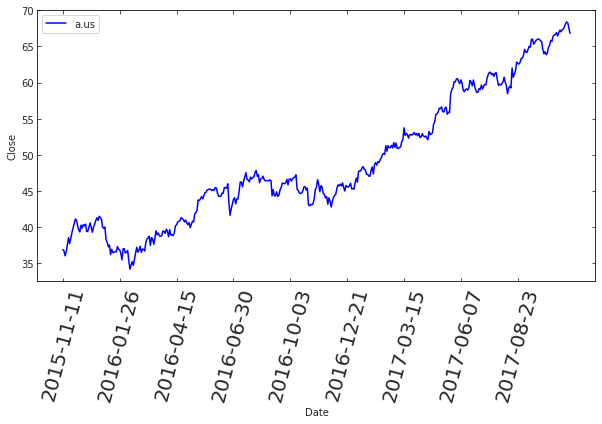

findfont: Font family ['["sans-serif"]'] not found. Falling back to DejaVu Sans.


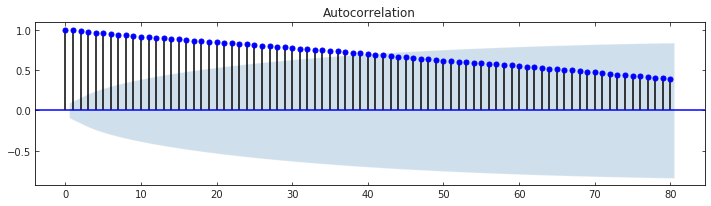

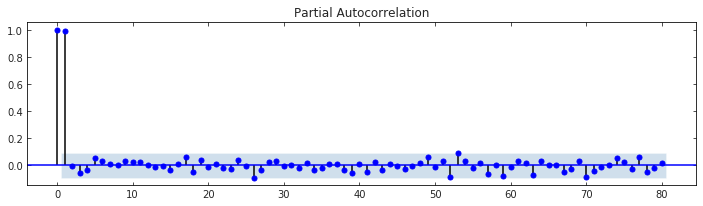

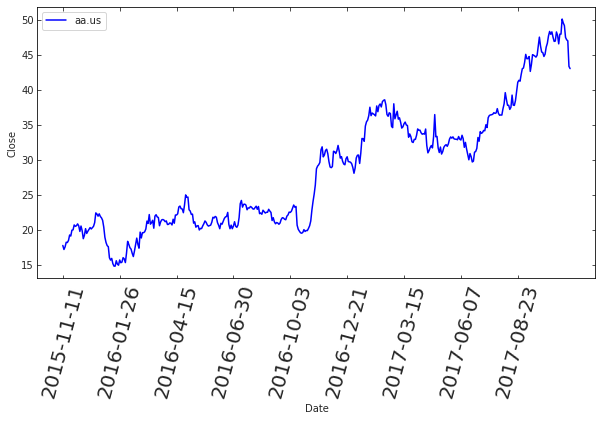

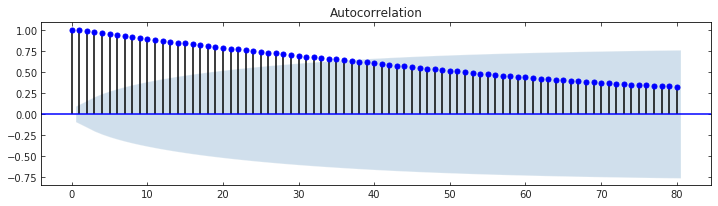

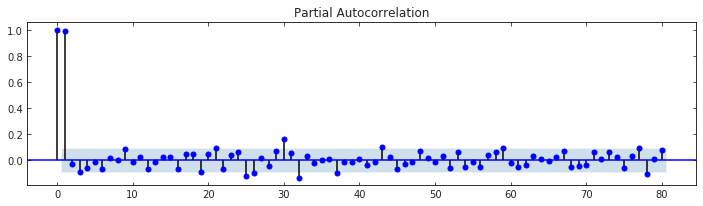

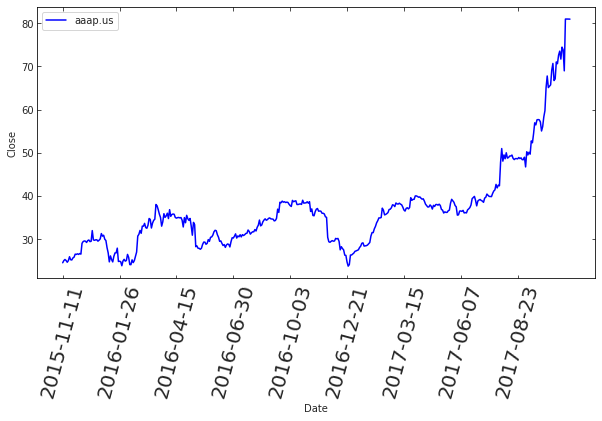

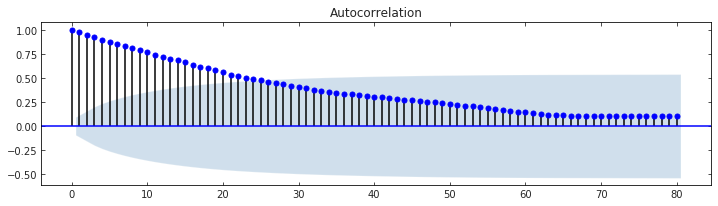

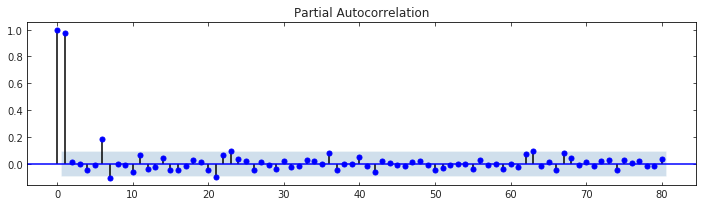

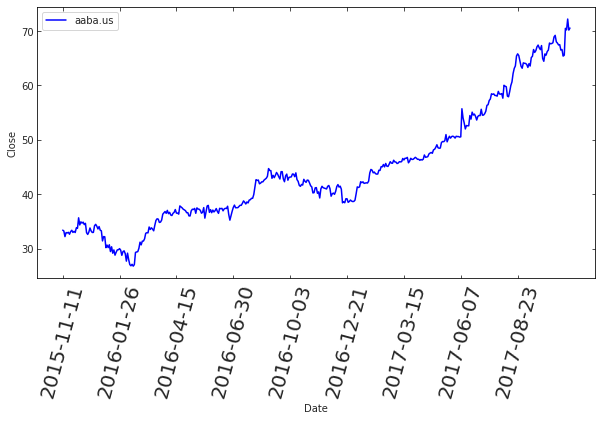

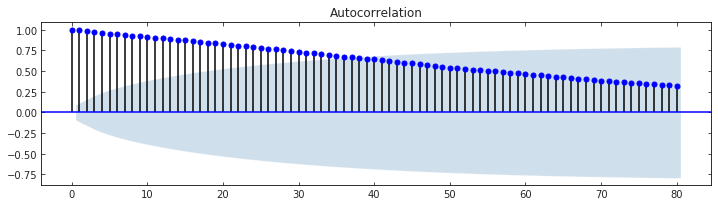

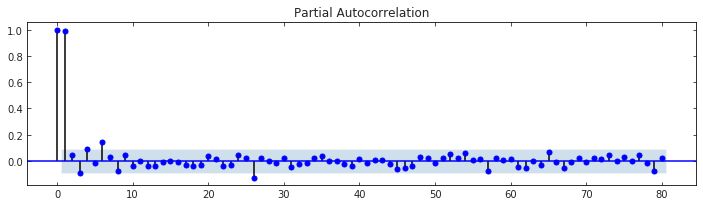

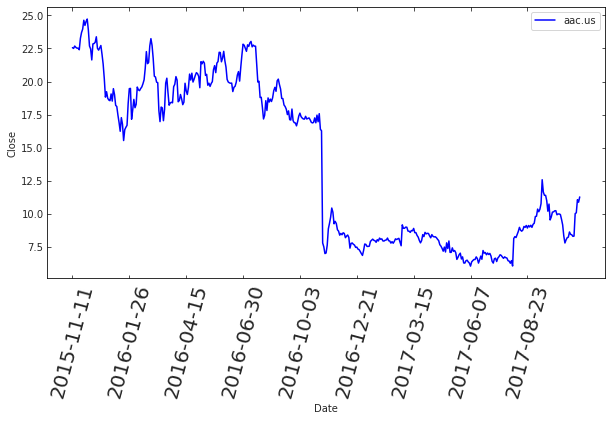

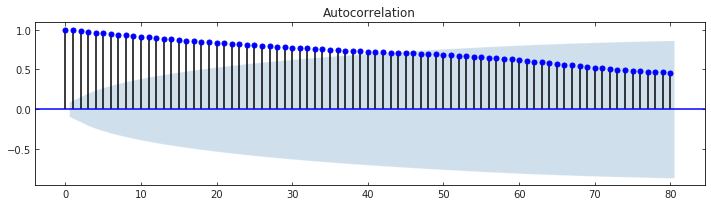

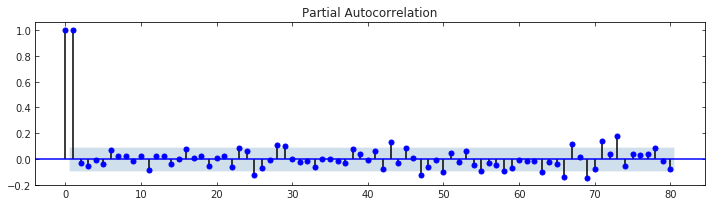

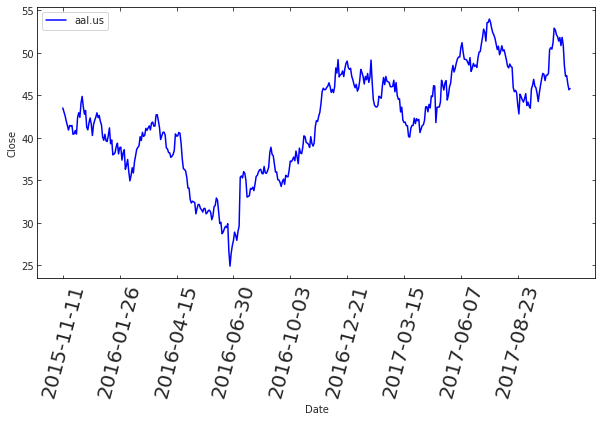

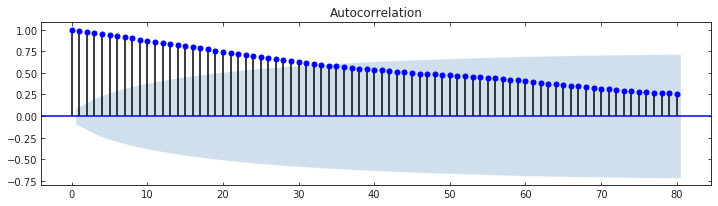

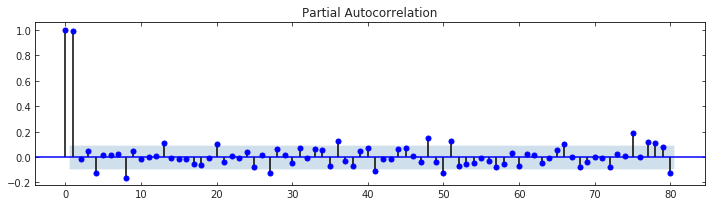

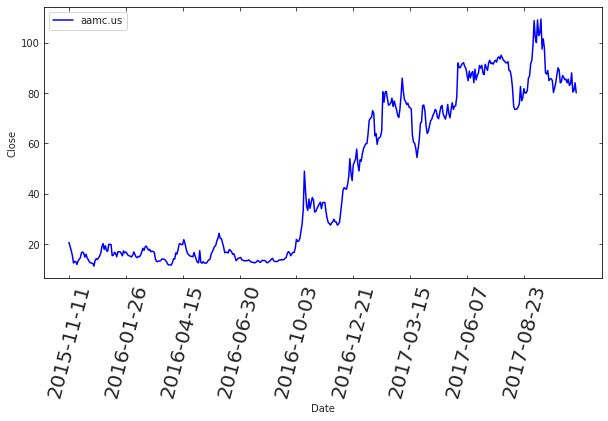

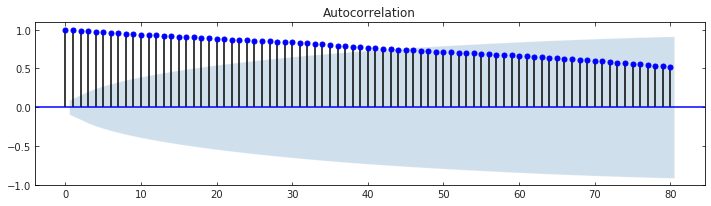

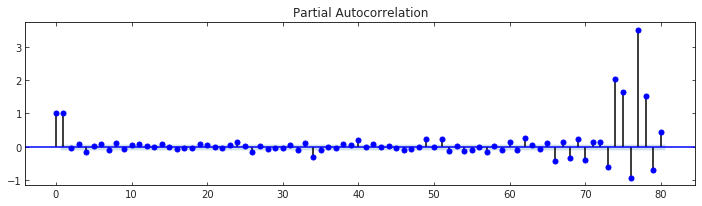

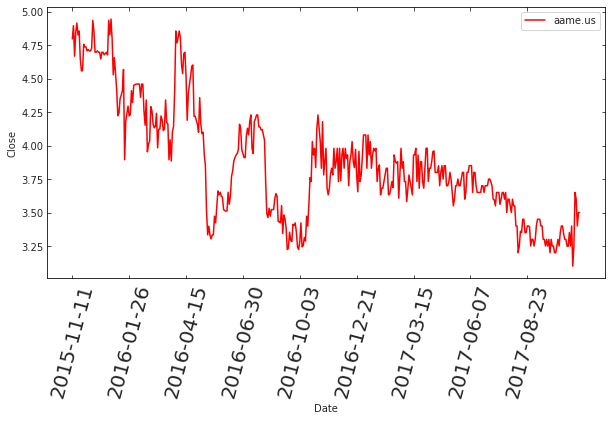

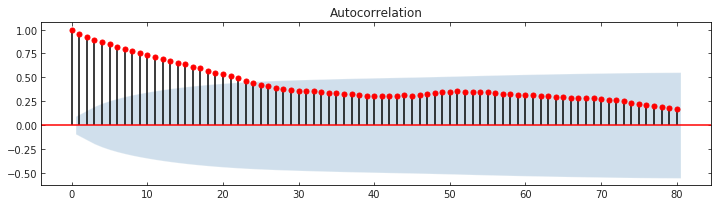

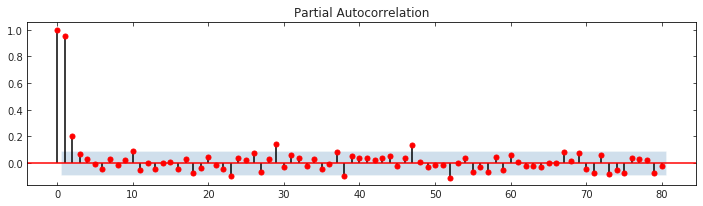

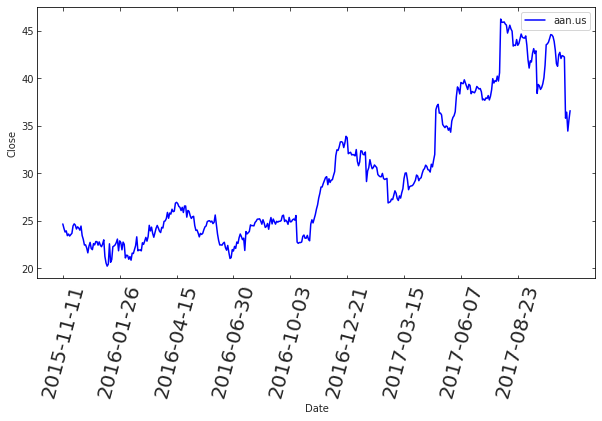

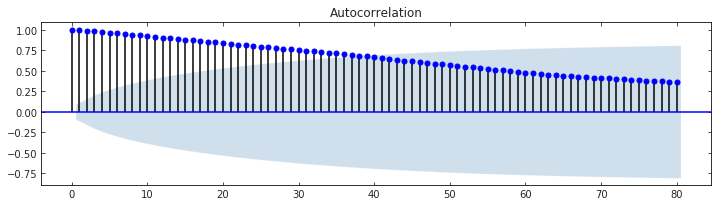

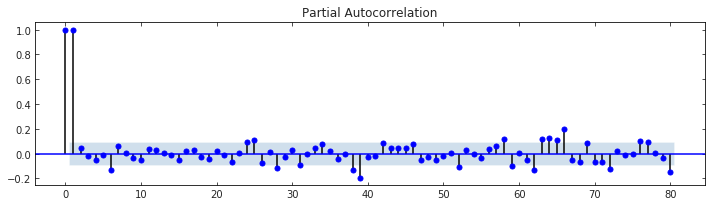

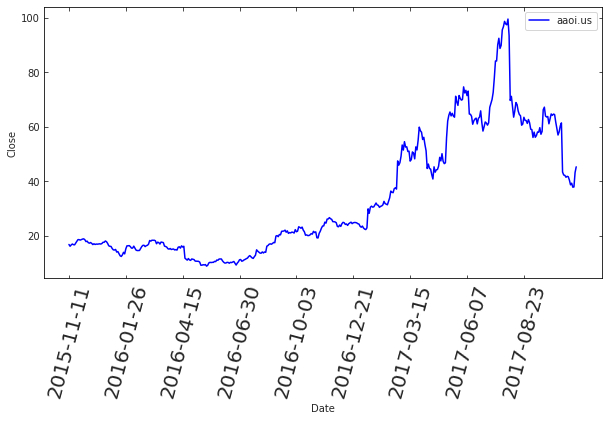

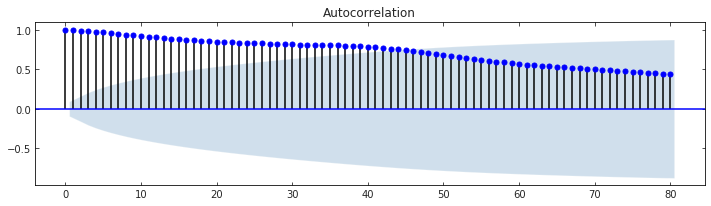

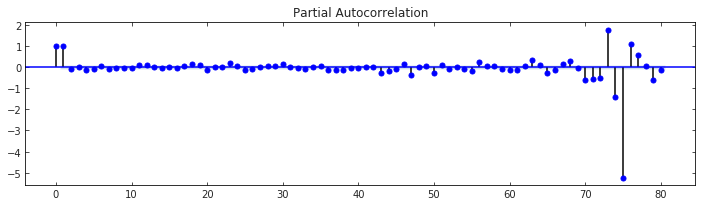

In [236]:
for c in tss.columns:
    stationary = sm.tsa.stattools.adfuller(tss[c])[1] >= threshold;
    if stationary:
        color = 'b'
    else:
        color = 'r'

    plt.figure(figsize = (10, 5));
    plt.plot(tss.index, tss[c], label = c, color = color);
    plt.ylabel("Close");
    plt.xlabel("Date");
    plt.xticks(tss.index[::50], rotation = 75, fontsize = 20);
    plt.legend();

    fig = plot_acf(tss[c], lags = 80, color = color);
    fig.set_size_inches(12, 3);

    fig = plot_pacf(tss[c], lags = 80, color = color);
    fig.set_size_inches(12, 3);

**Figure 4:** These figures show 3 pieces of information. The first chart for each stock is a reproduction of Figure 1. The second chart shows the autocorrelation plots. For all stocks, the autocorrelation decreased as the lag increased; there were no special lag values where the stocks repeated their actions. The third chart shows the partial autcorrelation plots. These charts are helpful for determining the order of an autoregressive model.

# Fit one of the stationary time series with ARMA

To fit the model to the data use ```statsmodels.api.tsa.ARMA```

Inspect the function call as ```statsmodels.api.tsa.ARMA?```

The statsmodels models are generally fit into 2 phases: generating the model ```sm.tsa.ARMA(data, parameters)```, and then fitting it ```sm.tsa.ARMA(data, parameters).fit()```. 

For at least one model look at the model summary ```mod.summary()``` What are the best fit parameters based on this printed summary and their uncertainties? What is the value of the AIC (Akaike Information Criterion)

See https://github.com/fedhere/A-Data-Driven-Evaluation-of-Delays-in-Criminal-Prosecution/blob/master/CodeExamples/ARMA/testingARMA_ARIMA.ipynb

## 1 Fit the model for a variety of parameters. You can run a nested loop to iterate over a range of p and q parameters
## 2. record the aic score for each fit
## 3. Find the best parameters to fit this time series with the AIC minimization criterion. For each model, after you fit it to the data, you can get the value of the AIC as ```model.aic```

In [227]:
min_p = 0
min_q = 0
min_mod = sm.tsa.ARMA(tss[['aame.us']], (p, q)).fit();

for p in range(5):
    for q in range(5):
        try:
            mod = sm.tsa.ARMA(tss[['aame.us']], (p,q)).fit();
            if mod.aic < min_mod.aic:
                min_mod = mod
                min_p = p
                min_q = q
        except:
            pass

#(tss[c], (3,1), dates=tss["Date"], ).fit()
#mod.plot_predict(dynamic=True, plot_insample=False)
min_mod.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                              ARMA Model Results                              
==============================================================================
Dep. Variable:                aame.us   No. Observations:                  447
Model:                     ARMA(1, 1)   Log Likelihood                 301.057
Method:                       css-mle   S.D. of innovations              0.123
Date:                Sun, 23 Feb 2020   AIC                           -594.115
Time:                        20:01:58   BIC                           -577.705
Sample:                             0   HQIC                          -587.645
                                                                              
=================================================================================
                    coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------
const             3.9275      0.204     19.247      0.000       3.528       4.327
ar.L1.aame.us     0.9811      0.010    100.057      0.000       0.962       1.000
ma.L1.aame.us    -0.2706      0.049     -5.576      0.000      -0.366      -0.175
                                    Roots                                    
=============================================================================
                  Real          Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
AR.1            1.0192           +0.0000j            1.0192            0.0000
MA.1            3.6958           +0.0000j            3.6958            0.0000
-----------------------------------------------------------------------------
"""

In [228]:
print("best parameters: p = {0}, q = {0}".format(min_p, min_q))

best parameters: p = 1, q = 1


## 4. predict the in-set and the future alues

you can use ```mod.plot_predict()``` to visualize them

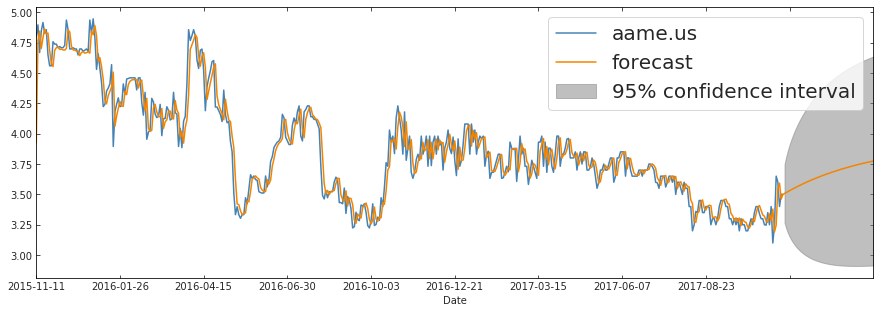

In [238]:
ax = tss[['aame.us']].plot(figsize=(15,5))
min_mod.plot_predict(end=500, plot_insample=False, ax=ax);
ax.legend(prop={"size":20});

**Figure 5:** This chart shows the forcast of the autoregressive model into the future. The forecast is accompanied by a confidence region that could feasibly also come true.

# 3.5 what are the coefficients of the best fit model? what do they mean? 


In [263]:
params = min_mod.params
print("The parameters of this model are:")
min_mod.params

The parameters of this model are:


const            3.927505
ar.L1.aame.us    0.981141
ma.L1.aame.us   -0.270580
dtype: float64

The `ar.L1.aame.us` term represents the autoregressive term with lag of 1.

The `ma.L1.aame.us` term represents tht moving average term with lag of 1.



#  choose 2 non stationary time series in the set that are not correlated and repeat steps 3.1-3.4 with the ARIMA model

choose a value of the integration order that is reasonable ...

**==> should chose two least correlated non-stationary TSes, the corr of a and aa is over 0.9!**

In [377]:
min_p = 0
min_d = 0
min_q = 0
min_aic = 100000
min_mod = None

for p in range(3):
    for d in range(3):
        for q in range(3):
            try:
                mod = sm.tsa.ARIMA(tss[['a.us']], (p,d,q)).fit();
                if mod.aic < min_aic:
                    min_p = p
                    min_d = d
                    min_q = q
                    min_aic = mod.aic
                    min_mod = mod
            except:
                pass

print("best parameters: p = {:d}, d = {:d}, q = {:d}".format(min_p, min_d, min_q))

best parameters: p = 2, d = 1, q = 1


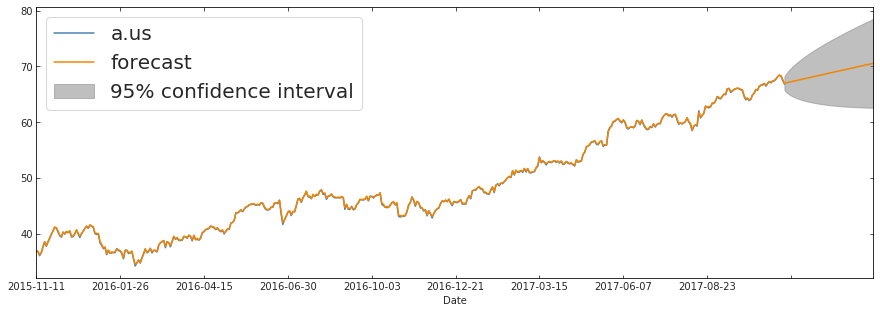

In [379]:
ax = tss[['a.us']].plot(figsize=(15,5))
min_mod.plot_predict(end=500, plot_insample=False, ax=ax);
ax.legend(prop={"size":20});

**Figure 6:** This chart shows the forcast of the autoregressive model into the future. The forecast is accompanied by a confidence region that could feasibly also come true.

In [384]:
min_p = 0
min_d = 0
min_q = 0
min_aic = 1000000
min_mod = None

for p in range(3):
    for d in range(3):
        for q in range(3):
            try:
                mod = sm.tsa.ARIMA(tss[['aa.us']], (p,d,q)).fit();
                if mod.aic < min_aic:
                    min_p = p
                    min_d = d
                    min_q = q
                    min_aic = mod.aic
                    min_mod = mod
            except:
                pass

print("best parameters: p = {:d}, d = {:d}, q = {:d}".format(min_p, min_d, min_q))

best parameters: p = 0, d = 1, q = 0


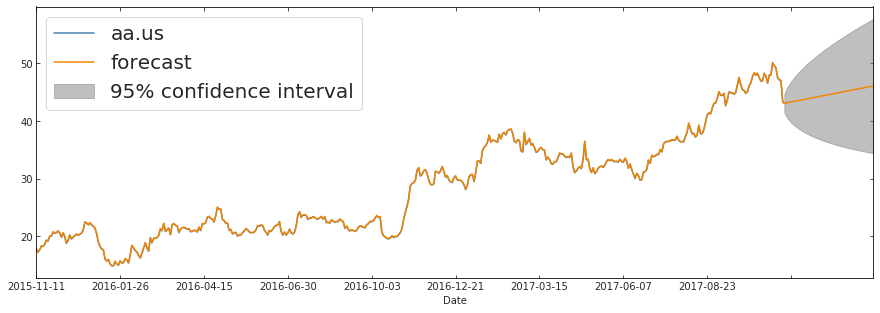

In [391]:
ax = tss[['aa.us']].plot(figsize=(15,5))
min_mod.plot_predict(end=500, plot_insample=False, ax=ax);
ax.legend(prop={"size":20});

**Figure 7:** This chart shows the forcast of the autoregressive model into the future. The forecast is accompanied by a confidence region that could feasibly also come true.

# Redo the fit to one of the non-stsationary lightcurves with a different order of integration and compare the results. What do the coefficients tell you?

**==>the order can only be either 1 or 2, cannot be 0!**

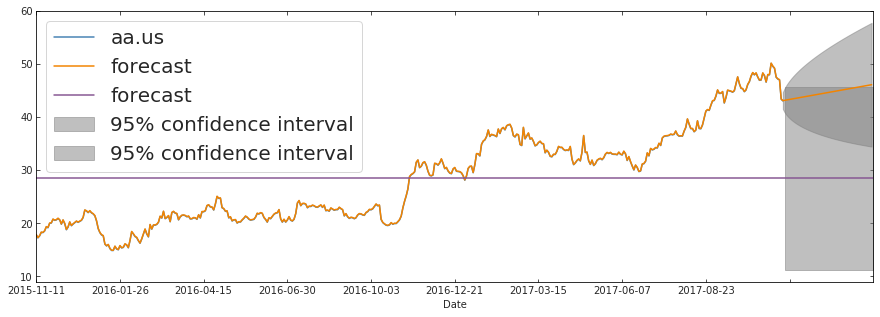

In [401]:
ax = tss[['aa.us']].plot(figsize=(15,5))
min_mod.plot_predict(end=500, plot_insample=False, ax=ax);
sm.tsa.ARIMA(tss[['aa.us']], (0,0,0)).fit().plot_predict(end=500, plot_insample=False, ax=ax);
ax.legend(prop={"size":20});

**Figure 7:** This chart shows the forcast of the autoregressive model into the future using the previous best model and a new model of smaaller integration order. The forecasts are accompanied by a confidence region that could feasibly also come true. The coefficients tell us the order of the forecast. A model with order of integration 0 produced a constant forecast. A model with order of intgration 1 produced a linearforecast.